# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)


## Generate Cities List

In [4]:
# Create a 2 lists for holding lat_longs and cities
lat_long = []
cities = []


# Create a set of random latitude and longitude combinations. 
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(latitudes, longitudes)


# Identify nearest city for each latitude, longitude combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
lat_longs_list = list(lat_longs)
#len(cities)
print(len(cities))

639


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# # Base URL to work off    
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
latitude = []
longitude = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        latitude.append(response["coord"]["lat"])  
        longitude.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print(f"City not found...skipping {city}.")


 8|east london
Processing record 9|cockburn town
City not found...skipping barentsburg.
Processing record 10|inhambane
Processing record 11|lompoc
Processing record 12|albany
Processing record 13|qaqortoq
Processing record 14|mayo
Processing record 15|upernavik
Processing record 16|punta arenas
Processing record 17|asmara
Processing record 18|faanui
Processing record 19|naze
Processing record 20|bluff
Processing record 21|barrow
City not found...skipping vaitupu.
Processing record 22|qaanaaq
Processing record 23|puerto ayacucho
Processing record 24|ankang
Processing record 25|hithadhoo
Processing record 26|port alfred
Processing record 27|yellowknife
Processing record 28|hermanus
City not found...skipping grand river south east.
Processing record 29|san quintin
Processing record 30|sterling
Processing record 31|palmer
Processing record 32|vaini
Processing record 33|georgetown
Processing record 34|caravelas
Processing record 35|mahebourg
Processing record 36|ushuaia
Processing record 37

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Creating city dataframe.  Use the lists created in cell above to make columns in csv.
city_weather_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":latitude,
                        "Lng":longitude,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_weather_df = city_weather_df.rename_axis('City ID')

#Exporting city_weather_df to csv and save to the output_files folder
city_weather_df.to_csv("output_files/city_weather.csv")

#Displaying dataframe
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Staroutkinsk,100,RU,1610292686,89,57.2302,59.3348,-6.47,15.17
1,Tasiilaq,90,GL,1610292686,53,65.6145,-37.6368,19.40,1.14
2,Airai,98,TL,1610292686,100,-8.9266,125.4092,63.19,0.47
3,Iqaluit,75,CA,1610292560,85,63.7506,-68.5145,6.80,5.75
4,Rikitea,100,PF,1610292686,79,-23.1203,-134.9692,77.59,15.93


In [7]:
# Do a count to determine how many city datapoints are in each column
city_weather_df.count()

City          593
Cloudiness    593
Country       593
Date          593
Humidity      593
Lat           593
Lng           593
Max Temp      593
Wind Speed    593
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Manually opened the csv file and found no cities with humidity >100%. This step was skipped. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

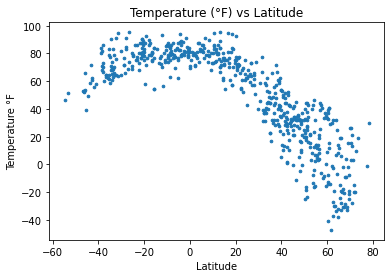

In [11]:
# Build a scatter plot for Latitude vs. Temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", s=7)

# Label this scatter plot and save this plot to output_files folder
plt.title("Temperature (°F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.savefig("output_files/Temperature (°F) vs Latitude")
plt.show()


The Temperature (°F) vs Latitude plot proves that as cities move away from the equator, the temperature drops. 
Inversely, cities that are closer to the equator have a warmer temperature. 

## Latitude vs. Humidity Plot

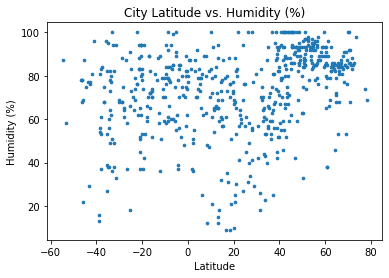

In [12]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", s=7)

# Label this scatter plot and save this plot to output_files folder
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_files/Latitude vs Humidity")
plt.show()

There does not seem to be a strong correlation to latitude in the City Latitude vs. Humidity plot.  
It does appear that there are more cities with humidity over 60% than can be found below 60%. 

## Latitude vs. Cloudiness Plot

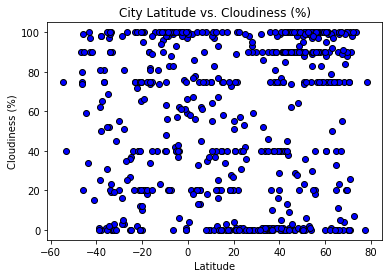

In [13]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", s=7)

# Label this scatter plot and save this plot to output_files folder
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")
plt.savefig("output_files/Latitude vs Cloudiness")
plt.show()

The City Latitude vs. Cloudiness (%) plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

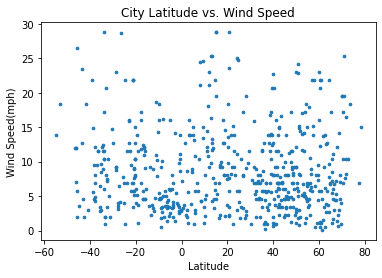

In [14]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o", s=7)

# Label this scatter plot and save this plot to output_files folder
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed")
plt.savefig("output_files/Latitude_vs_WindSpeed")
plt.show()

The City Latitude vs. Wind Speed plot suggests there is no correlation between Wind Speed and Latitude.
The majority of cities show a wind speed between 0-15 mph. 

## Linear Regression

In [31]:
# run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
        # Northern Hemisphere - Temperature (F) vs. Latitude
        # Southern Hemisphere - Temperature (F) vs. Latitude
        # Northern Hemisphere - Humidity (%) vs. Latitude
        # Southern Hemisphere - Humidity (%) vs. Latitude
        # Northern Hemisphere - Cloudiness (%) vs. Latitude
        # Southern Hemisphere - Cloudiness (%) vs. Latitude
        # Northern Hemisphere - Wind Speed (mph) vs. Latitude
        # Southern Hemisphere - Wind Speed (mph) vs. Latitude

# Create Northern and Southern Hemisphere DataFrames using "loc" and pull from city_weather_df
northern_hem_df = city_weather_df.loc[city_weather_df["Lat"] >=0]
southern_hem_df = city_weather_df.loc[city_weather_df["Lat"] <0]

In [34]:
#define a function to call linear regressions and scatter plots
def linear_regression_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8676848442081349


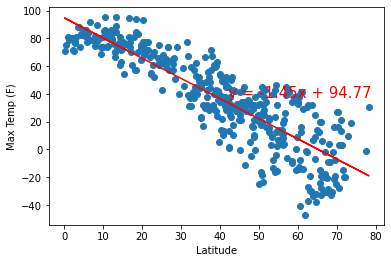

None


In [35]:
# Label x and y values of plot and print result for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_regression_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5581560556022106


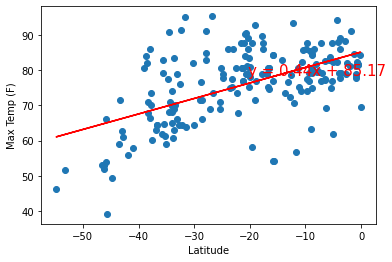

None


In [36]:
# Label x and y values of plot and print result for Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

Both graphs above are showing Max temperature vs. latitude linear regression
There are high positive correlations between max temperature and latitude in both hemispheres.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


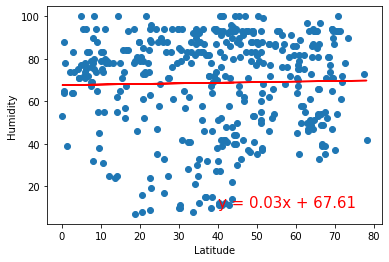

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


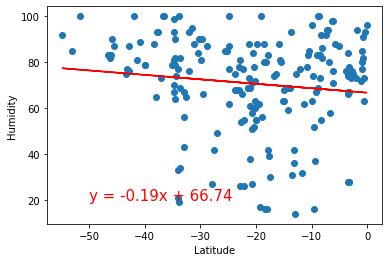

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


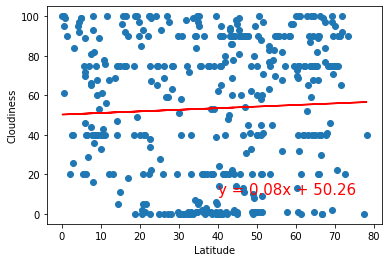

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


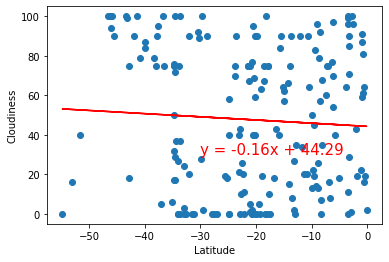

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


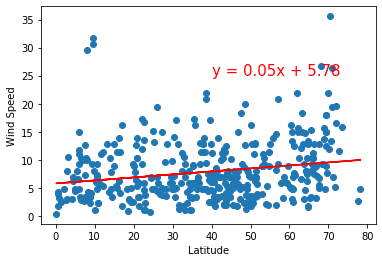

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


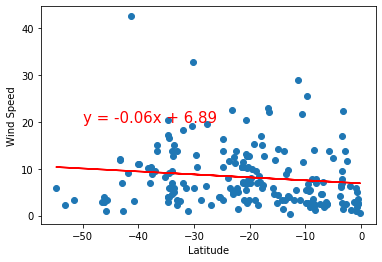